Титаник

------

In [1]:
import os
os.chdir("E:\\видео уроки\\Анализ данных\\Computer Science Center\\Data\\")

import pandas as pd

df = pd.read_csv('titanic.csv')

In [2]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [4]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [5]:
for column in ['Survived', 'Pclass', 'Sex']:
    print(df[column].value_counts(normalize=True))

0    0.614431
1    0.385569
Name: Survived, dtype: float64
3    0.549042
1    0.243517
2    0.207441
Name: Pclass, dtype: float64
male      0.645998
female    0.354002
Name: Sex, dtype: float64


Хотим представить ту же информацию, но в картинках для отчёта.

In [6]:
import matplotlib
import matplotlib.pyplot as plt

# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

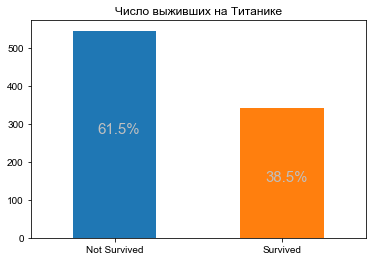

In [7]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

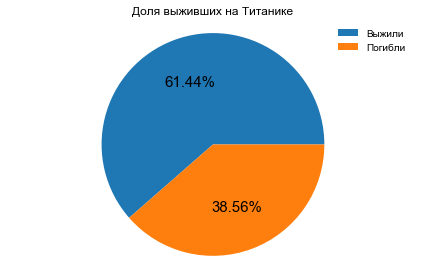

In [8]:
fig, ax = plt.subplots(1)
df['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

**Boxplot (ящик с усами)**

Гистограммы информативны, но если нужно вывести много гистограмм на одной картинке, то всё смешается. В этом случае целесообразно использовать boxplot.

Text(0.5, 1.0, 'Распределение возраста')

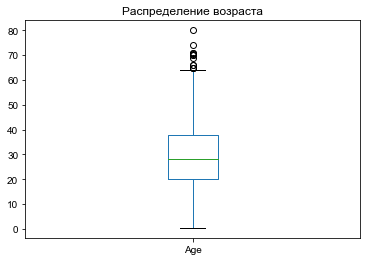

In [13]:
df['Age'].plot(kind='box')
plt.title(u'Распределение возраста')

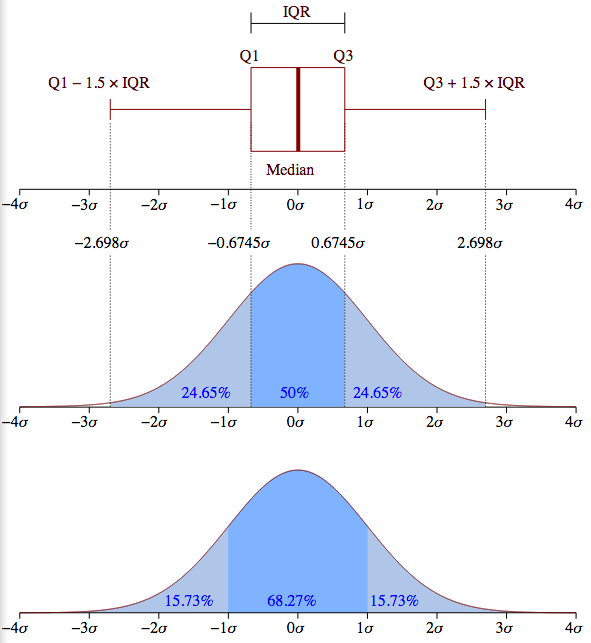

In [16]:
from IPython.display import Image

#импортируем картинку
Image('boxplot_explanation.png')

Text(0.5, 0.98, '')

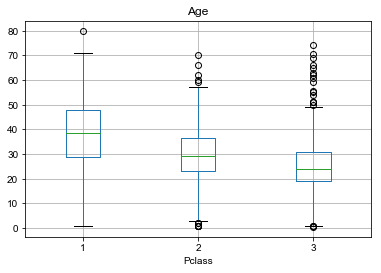

In [17]:
ax = df.boxplot(column='Age', by='Pclass')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')